<a href="https://colab.research.google.com/github/skyworld19/ds-school-advanced/blob/master/ML_04_Regularization_%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 4_Regularization

- 규제 모델
    - Ridge Regression : L2 규제 가중치
    - Lasso Regression : L1 규제 가중치 적용
    - Elastic Net : L1 + L2 규제 가중치 적용

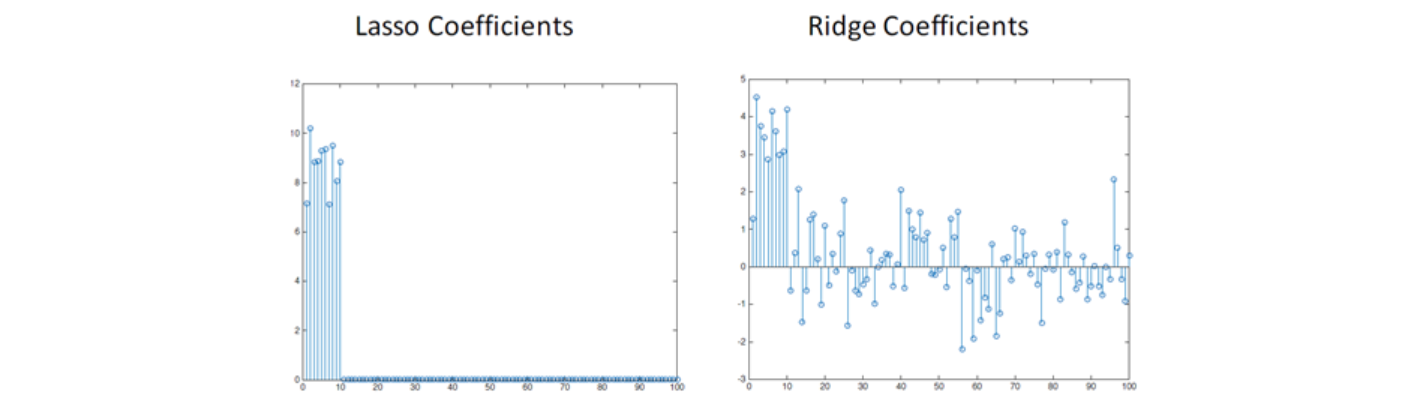

#### A. 데이터 준비

In [ ]:
# sin 파형을 따르는 데이터를 1, 4, 15 차항으로 변환하여 결과 비교
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def sin(X):
    return np.sin(1.5 * np.pi * X)

m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1

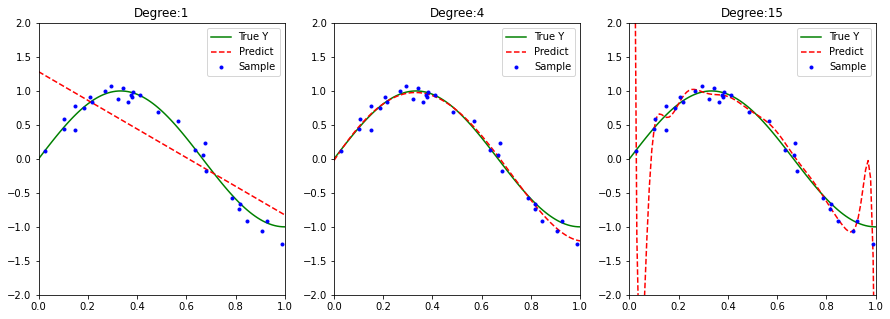

In [ ]:
degrees = (1, 4, 15)
plt.figure(figsize=(15, 5))
for i, degree in enumerate(degrees):
    polynomial = PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    pipe = Pipeline([('polynomial', polynomial), ('linear_regression', lr)])
    pipe.fit(X.reshape(-1, 1), y)
    
    X_test = np.linspace(0, 1, 100)
    plt.subplot(1, len(degrees), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]), 'r--', label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend()
    plt.title(f'Degree:{degree}')
plt.show()

### 15차항 변환된 데이터를 기반으로 Ridge Regression 모델 이용

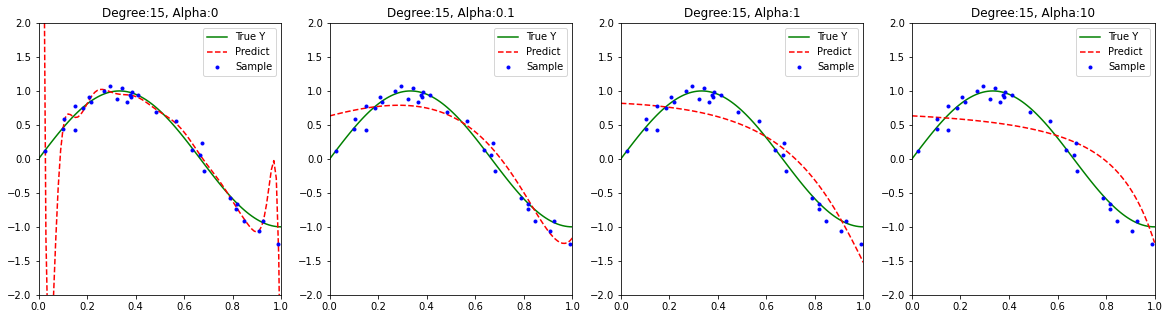

In [ ]:
from sklearn.linear_model import Ridge

alphas = (0, 0.1, 1, 10)
plt.figure(figsize=((20, 5)))

for i, alpha in enumerate(alphas):
    polynomial = PolynomialFeatures(degree=15)
    ridge = Ridge(alpha=alpha)
    pipe = Pipeline([('polynomial', polynomial), ('ridge', ridge)])
    pipe.fit(X.reshape(-1, 1), y)

    X_test = np.linspace(0, 1, 100)
    plt.subplot(1, len(alphas), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]),
            'r--', label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend()
    plt.title(f'Degree:15, Alpha:{alpha}')
plt.show() 

### Ridge Regression -보스턴 주택 가격 예측
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
import pandas as pd
from sklearn.datasets import load_boston

# 보스턴 주택 데이터 준비, X, y, feature_names 각각을 준비한다
boston = 
X =
y = 
feature_names = 
# DataFrame으로 변환한다, y는 'PRICE'라는 이름의 열로 추가한다
df = 

# 앞에서 5개의 데이터를 출력해 확인한다


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. 보스턴 데이터(df) 중 'CRIM':'LSTAT'에 대해 X로 사용한다
# 2. 보스턴 데이터(df) 중 'PRICE'를 y 로 이름 붙인다
# 3. X에 대해 MinMaxScaler()를 적용하여 결과를 x_scaled로 이름 붙인다 

X = 
y = 
x_scaled = 

# 4. 상수항 없는 3차항 변환을 위한 PolynomialFeatures 객체를 생성하여 P라는 이름을 지정한다.
# 5. x_scaled를 사용하여 3차항 변환을 적용하고 결과를 x_poly에 저장한다
degree = 3
P = 
x_poly = 
# 6. x_poly, y 데이터를 75%:25%로 분할하여 저장한다. (random_state=0을 사용함)
x_train, x_test, y_train, y_test = 

In [ ]:
from sklearn.linear_model import Ridge
# train 데이터를 사용하여 Ridge 모델을 훈련시킨다. (alpha=1 사용) 
alpha=1


(0.9242749146283602, 0.7865342899841091)

In [ ]:
# train 데이터를 사용하여 Ridge 모델을 훈련시킨다. (alpha=0.1 사용) 
# train, test 성능을 확인한다
alpha=0.1


(0.953715539703465, 0.790557043211049)

In [ ]:
# train 데이터를 사용하여 Ridge 모델을 훈련시킨다. (alpha=10 사용) 
# train, test 성능을 확인한다
alpha=10


(0.8555501939781199, 0.7230747746713161)

#### L2 규제 효과
- L2 규제를 적용하면 특정 가중치가 너무 커지거나 너무 작은 값을 가지지 않도록 설정
- 즉 규제 강도가 커질수록 특정 가중치에 값이 쏠리는 현상이 제거
    - 일부만 가지고 모델링을 하는 것이 아니라 특성을 골고루 사용하는 의미로 해석 가능
- 규제 강도를 0.1, 1, 10으로 설정하여 학습 후 가중치 값 조회

In [ ]:
ridge01 = Ridge(alpha=0.1).fit(boston['data'], boston['target'])
ridge01_coef = pd.Series(ridge01.coef_, index=boston['feature_names'])

ridge1 = Ridge(alpha=1).fit(boston['data'], boston['target'])
ridge1_coef = pd.Series(ridge1.coef_, index=boston['feature_names'])

ridge10 = Ridge(alpha=10).fit(boston['data'], boston['target'])
ridge10_coef = pd.Series(ridge10.coef_, index=boston['feature_names'])

#### L2 규제 효과
- 규제 강도에 따른 가중치 값을 시각화
- 규제 강도가 커질수록 특정 특성(NOX)이 큰 값을 가지지 못하는 것을 확인할 수 있음

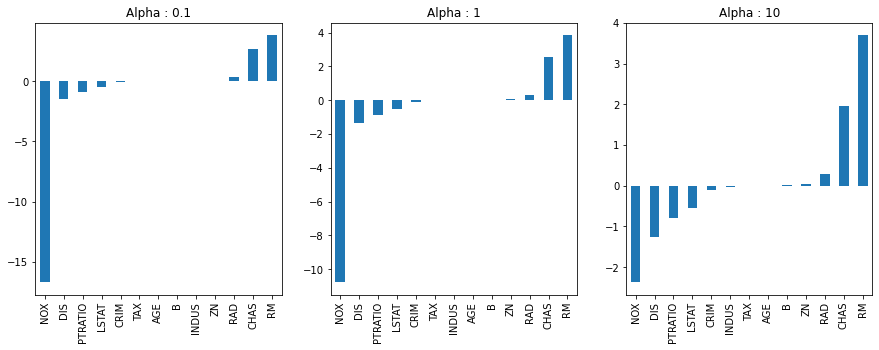

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
ridge01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')

plt.subplot(1, 3, 2)
ridge1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')

plt.subplot(1, 3, 3)
ridge10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()

### Lasso Regression -보스턴 주택 가격 예측
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 보스턴 주택 데이터 준비, X, y, feature_names 각각을 준비한다
boston = load_boston()
X = boston['data']
y = boston['target']
feature_names = boston['feature_names']
# DataFrame으로 변환한다, y는 'PRICE'라는 이름의 열로 추가한다
df = pd.DataFrame(X, columns=feature_names)
df['PRICE'] = y
# 앞에서 5개의 데이터를 출력해 확인한다
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.linear_model import Lasso
# train 데이터를 사용하여 Lasso 모델을 훈련시킨다. (alpha=1 사용) 
# train, test 성능을 확인한다
model = 

(0.2933995968826699, 0.21247966404486662)

In [ ]:
# train 데이터를 사용하여 Lasso 모델을 훈련시킨다. (alpha=0.1 사용) 
# train, test 성능을 확인한다
lasso01 = 

(0.783861983129184, 0.6452299604478746)

In [ ]:
# train 데이터를 사용하여 Lasso 모델을 훈련시킨다. (alpha=10 사용) 
# train, test 성능을 확인한다
lasso10 = 

(0.0, -0.001119359203955339)

#### L1 규제의 효과
- L1 규제를 적용하면 특정 가중치를 선택
- 즉 중요한 특성만 사용하는 의미로 해석 가능
- 규제 강도를 0.1, 1, 10으로 설정하여 학습 후 가중치 값 조회

In [ ]:
# L1 규제의 효과
lasso01 = Lasso(alpha=0.1).fit(boston['data'], boston['target'])
lasso01_coef = pd.Series(lasso01.coef_, index=boston['feature_names'])

lasso1 = Lasso(alpha=1).fit(boston['data'], boston['target'])
lasso1_coef = pd.Series(lasso1.coef_, index=boston['feature_names'])

lasso10 = Lasso(alpha=10).fit(boston['data'], boston['target'])
lasso10_coef = pd.Series(lasso10.coef_, index=boston['feature_names'])

#### L1 규제의 효과
- 규제 강도에 따른 가중치 값을 시각화
- 규제 강도가 커질수록 사용되는 특성의 수가 적은것을 확인
- 무조건 특성을 적게 쓴다고 좋은 것은 아님

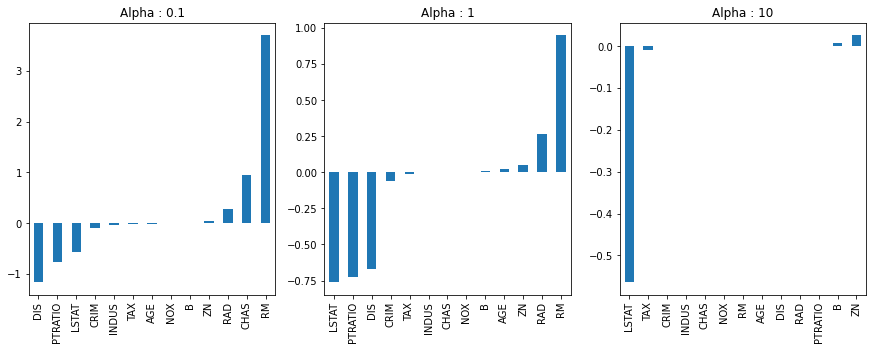

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
lasso01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')

plt.subplot(1, 3, 2)
lasso1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')

plt.subplot(1, 3, 3)
lasso10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()